## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('./ab_data.csv') #read the ab_data file
df.head() #ensure the file loaded into df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0] #find the number of rows

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique() #find unique values for user_id column

290584

d. The proportion of users converted.

In [5]:
df['converted'].mean() #proportion of users converted

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#
df.query('group == "treatment" and landing_page != "new_page"').count()['user_id'] + df.query('group != "treatment" and landing_page == "new_page"').count()['user_id']

3893

f. Do any of the rows have missing values?

In [7]:
df.info() #check if any of the rows have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.query('(group=="treatment" and landing_page=="new_page") or (group=="control" and landing_page=="old_page")')
df2.head()
df2.shape[0]

290585

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique() #use nunique on the df to get the count of unique values

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2['user_id'].duplicated()] #find the duplicated user_id using duplicated

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
df2.query('user_id == 773192') #use query to ensure rows with the same user_id are duplicates

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates('user_id', inplace=True) #drop duplicates from user_id column and keep in same df
df2.head() #check df is intact

/Users/ajkim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [14]:
df2[df2['user_id'].duplicated()] #ensure duplicates are removed

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2['converted'].mean() #find the proportion of the converted column

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
df2.query('group == "control"').converted.mean() #use query to filter individuals in control group and find the proportion of the converted column

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
df2.query('group == "treatment"').converted.mean() #use query to filter individuals in treatment group and find the proportion of the converted column

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
#get the count of users who got the new page using df.query then divide by the total number in df2 to get the probability
df2.query('landing_page =="new_page"').count()['user_id'] / df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Based on the proportions above, there isn't enough evidence to say that the new treatment page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**The alternative hypothesis should be that the conversion rate of the new page is definitely better than the conversion rate of the old. Which makes the null hypothesis stating that the new page is worse or the same as the old conversion rate.**

$$H_0: p_{new} - p_{old} \leq 0$$


$$H_1: p_{new} - p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [19]:
df2.head() #check to make sure it loads properly

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**Commenting out the below section per advice from reviewer. Did not need to create a new df.**

In [20]:
#we can only trust when treatment aligns with new page and control aligns with old page. use query and create a new df.
#df2_ab = df_ab.query('(group=="treatment" and landing_page=="new_page") or (group=="control" and landing_page=="old_page")')

In [21]:
#df2_ab['user_id'].nunique(), df2_ab.shape[0] #get the number of unique values for user_id and the number of total rows

In [22]:
#remove the duplicates and get the number of unique user_ids and number of rows to verify
#df2_ab.drop_duplicates('user_id', inplace=True)
#df2_ab['user_id'].nunique(), df2_ab.shape[0]

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
df2['converted'].mean() #get the converted rate on the new df

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [24]:
df2['converted'].mean() #converted rate is the same for old and new per question 2

0.11959708724499628

c. What is $n_{new}$?

In [25]:
df2.query('landing_page == "new_page"').count()['user_id'] #get the count of users who got the new page

145310

d. What is $n_{old}$?

In [26]:
df2.query('landing_page == "old_page"').count()['user_id'] #get the count of users who got the old page

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
n_new = df2.query('landing_page == "new_page"').count()['user_id'] #store the n_new count in a variable
p_new = df2['converted'].mean() #store the p_new in a variable

new_page_converted = np.random.choice([0,1],n_new,p=(p_new,1-p_new)) 
#use np.random.choice to populate the array using the n_new as the number of transactions and the probability of p_new 
new_page_converted #verify the array is populated 



array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
n_old = df2.query('landing_page == "old_page"').count()['user_id'] #store the n_old count in a variable
p_old = df2['converted'].mean() #store the p_old in a variable

old_page_converted = np.random.choice([0,1],n_old,p=(p_old,1-p_old)) 
#use np.random.choice to populate the array using the n_old as the number of transactions and the probability of p_old 
old_page_converted #verify the array is populated 


array([1, 1, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
new_page_converted.mean() - old_page_converted.mean() #find the proportion of each and then find the difference


-0.0019389366066526748

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [30]:
p_diffs = [] #create the p_diffs array

for _ in range(10000): #10000 sample size
    bootsamp = df2.sample(200, replace = True) #bootstrapping sampling technique
    new_page_converted = np.random.choice([0,1],n_new,p=(p_new,1-p_new)) #simulate transactions based on new page numbers calculated above
    old_page_converted = np.random.choice([0,1],n_old,p=(p_old,1-p_old)) #simulate transactions based on old page numbers calculated above
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean()) #append the difference in proportions from the two simulations above

In [31]:
p_diffs #verify that values were appended to the arrary

[-0.0006931566524587263,
 -0.0015464483897753567,
 0.0017984237203921838,
 0.0010413924580630063,
 -0.000692882087582336,
 -0.001773694027689121,
 0.0009657416867474566,
 -0.0020006975027927476,
 0.00108947323977171,
 -0.002145149608662633,
 -0.0014705793308563697,
 -0.0004794495831085266,
 -0.0018838511993398699,
 0.0007452704492312279,
 -0.000293836052539187,
 0.0004634441940877254,
 0.0009724802743350525,
 -0.0004589456124942659,
 0.0013925504184226778,
 -0.000968450670014942,
 0.00027745548169999523,
 0.0013443621982841547,
 -0.00018355438873962626,
 0.000600889968981333,
 -0.0006381411653937352,
 0.001509282461958139,
 -0.0009821341951902207,
 -0.0010163472715580824,
 0.0012891335397313686,
 -0.000630998404665295,
 -0.0014639140742606083,
 -0.00025954282369189396,
 -0.00026637691210595893,
 0.001722801940398977,
 -3.9235301878215445e-05,
 -0.0002317801270599329,
 0.0005115812530691599,
 -0.0028059852001365293,
 0.00013297097376396838,
 -0.0001698981495148466,
 0.000256961743317352

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

**I would expect a normal distribution due to the Central Limit theorem**

In [32]:
#compute the actual converted rate for old and new pages
#get the count of users who landed on the new page and converted
new_convert = df2.query('landing_page == "new_page" and converted == 1')['user_id'].count()
#get the count of users who landed on the old page and converted
old_convert = df2.query('landing_page == "old_page" and converted == 1')['user_id'].count()

In [33]:
#calculate the actual converted rate
actual_conv_new = new_convert / n_new #get the number of users converted from new page divided by the total number of users who got the new page
actual_conv_old = old_convert / n_old #get the number of users converted from old page divided by the total number of users who got the old page

In [34]:
#get the observed difference
obs_diff = actual_conv_new - actual_conv_old
obs_diff #display obs_diff

-0.0015782389853555567

(array([   6.,   57.,  383., 1394., 2650., 2950., 1819.,  609.,  117.,
          15.]),
 array([-0.00478821, -0.00385972, -0.00293123, -0.00200274, -0.00107426,
        -0.00014577,  0.00078272,  0.0017112 ,  0.00263969,  0.00356818,
         0.00449667]),
 <a list of 10 Patch objects>)

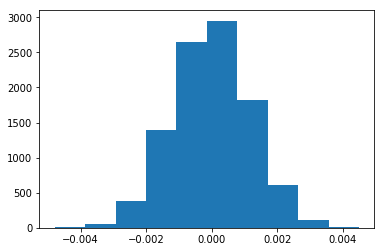

In [35]:
plt.hist(p_diffs) #plot the histogram of the p_diffs

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

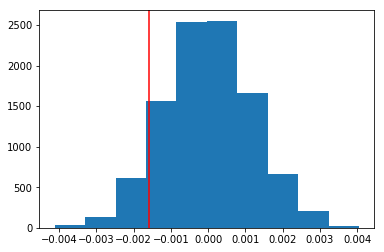

In [36]:
p_diffs = np.array(p_diffs) #change to array so we can use numpy functions
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size) #simulate from the null using a normal distribution
plt.hist(null_vals) #plot the null values
plt.axvline (x=obs_diff, c='r') #draw a red line of the observed difference

In [37]:
(null_vals > obs_diff).mean() #proportion of all values above the obs difference (red line above)

0.9118

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We just calculated the p-value. The p-value is the probability we obtain an observed statistic, or one more extreme, from the null hypothesis.**

**With a type 1 error rate of .05, we fail to reject the null hyopothesis. This means the new page is the same or worse at converting than the old page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm

convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].count() #count of users converted from old_page
convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].count() #count of users converted from new_page
n_old = df2.query('landing_page == "old_page"')['user_id'].count() #count of users from old_page
n_new = df2.query('landing_page == "new_page"')['user_id'].count() #count of users from new_page

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [39]:
#I inserted the variables based on the documentation
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value #print the value or the z-score and p-value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**With a type 1 error rate of .05, the p-value is still high enough where we would fail to reject the null hypothesis. Z-score above 1.96 would be significant, but in this case it is not.**

**We fail to rejet the null hypothesis, suggesting that the new page is the same or worse at converting than the old page.**

**The answers in parts j and k are almost the same as the built-in results. They are similar because in parts j and k we were calculating the p-value step by step.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression can be used in this case since the response is categorical--Convert or Not Convert.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [40]:
df2['intercept']=1 #create the intercept in teh dataframe
df2[['treatment','ab_page']]=pd.get_dummies(df['group']) #create the dummy variables for ab_page
df2[['new_page','old_page']]=pd.get_dummies(df['landing_page']) #create the dummy variables for ab_page
df3 = df2.drop(columns=['treatment','old_page']) #create a new df and drop unneccessary column
df3.head() #verify the df3 has all of the needed columms

/Users/ajkim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/ajkim/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,ab_page,new_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [41]:
#user logistic regression model to determine if the treatment and control causes a difference in converts 
log_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [42]:
results.summary() #print the summary of results

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 13 Jan 2019   Pseudo R-squ.:               8.077e-06
Time:                        17:27:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**P-value is 0.19.**

**Null hypothesis is that there is no difference between the response and coefficients. 
The alternative hypothesis is that there is a difference between the response and coefficients. This is a two tail test.**

**Part 2, we were interested in if the new page was better than the old page--which is essentially a one tail test.**

**The two hypotheses are different and therefore the p-values will be different since they are calculating different probabilities.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Certain variables may not be independent and require more factors to be added to the regression model (i.e. home value examples are dependent on a number of things)**

**You can run into multicollinearity which can make our responses unreliable and the expected relationships may not hold between x and y variables**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [43]:
countries_df = pd.read_csv('./countries.csv') #read the countries file
df_new = countries_df.set_index('user_id').join(df3.set_index('user_id'), how='inner') #join the file with df3 using an inner join
df_new.head() #verify the country column was added properly

,country,timestamp,group,landing_page,converted,intercept,ab_page,new_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1


In [44]:
df_new['country'].unique() #get the unique values in the country column


array(['UK', 'US', 'CA'], dtype=object)

In [45]:
### Create the necessary dummy variables
df_new['intercept']=1 #create the intercept
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country']) #create the dummy variables 

In [46]:
df_new.head() #verify the dummy variables were added properly

,country,timestamp,group,landing_page,converted,intercept,ab_page,new_page,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,1,0


In [47]:
#use logistic regression model to get the summary of results
log_mod2 = sm.Logit(df_new['converted'], df_new[['intercept','new_page','UK','US']]) #drop one of the columns 
results = log_mod2.fit()
results.summary() #print the results

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 13 Jan 2019   Pseudo R-squ.:               2.323e-05
Time:                        17:27:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
new_page      -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [48]:
#calculate the exponential to interpret the values. Use the reciprical for negative values and change to every unit decrease
1/np.exp(-0.0015), np.exp(0.0506), np.exp(0.0408)

(1.001501125562711, 1.0519020483004984, 1.0416437559600236)

**For every one unit decrease on the new_page, converting is expected to be 1.0015 times more likely holding all other variables constant.**

**For every one unit increase for UK, converting is expected to be 1.0519 times more likely holding all other variables constant.**

**For every one unit increase for US, converting is expected to be 1.0416 times more likely holding all other variables constant.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [49]:
### Fit Your Linear Model And Obtain the Results

#create high order terms or interaction variables by multiplying country and new_page
df_new['uk_new'] = df_new['UK']*df_new['new_page']
df_new['us_new'] = df_new['US']*df_new['new_page']

In [50]:
#use the OLS model for the higher order terms
lm = sm.OLS(df_new['converted'],df_new[['intercept','new_page','uk_new','us_new','UK','US']])
results = lm.fit() 
results.summary() #print the summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.466
Date:                Sun, 13 Jan 2019   Prob (F-statistic):              0.197
Time:                        17:27:56   Log-Likelihood:                -85265.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290578   BIC:                         1.706e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1188      0.004     31.057      0.000       0.111       0.126
new_page      -0.0069      0.005     -1.277      0.202      -0.017       0.004
uk_new         0.0080      0.006      1.360      0.174      -0.004       0.020
us_new         0.0047      0.006      0.845      0.398      -0.006       0.016
UK             0.0012      0.004      0.296      0.767      -0.007       0.009
US             0.0018      0.004      0.467      0.641      -0.006       0.010
==============================================================================
Omnibus:                   125549.436   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414285.945
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The higher order terms are not easily interpretable.**

**The p-values for all variables are not less than 0.05 so they are not statistically significant.**

**Convert for UK users is .0012 times more likely than CA users**
**Convert for US users is .0018 times more likely than CA users**

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

**References used: GitHub, StackOverflow, Student Knowledge Center on Udacity**